In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from transformers import RobertaTokenizer

import os 
import os.path as osp
import re

from pathlib import Path

In [2]:
def pos_confusion(x, outlier):
    out = []
    for pos in upos:
        mask = x[f"pos_outlier_{outlier}_generated_tokens"] == pos
        out.append(mask.sum() / x.shape[0])

    out = [i.round(2) for i in out]

    return np.array(out)

In [3]:
upos = [
    "ADJ", "ADP", "ADV", "AUX", "CCONJ", "DET", "INTJ", "NOUN", "NUM", "PART", 
    "PRON", "PROPN", "PUNCT", "SCONJ", "SPACE", "SYM", "VERB", "X",
    # "_"
]

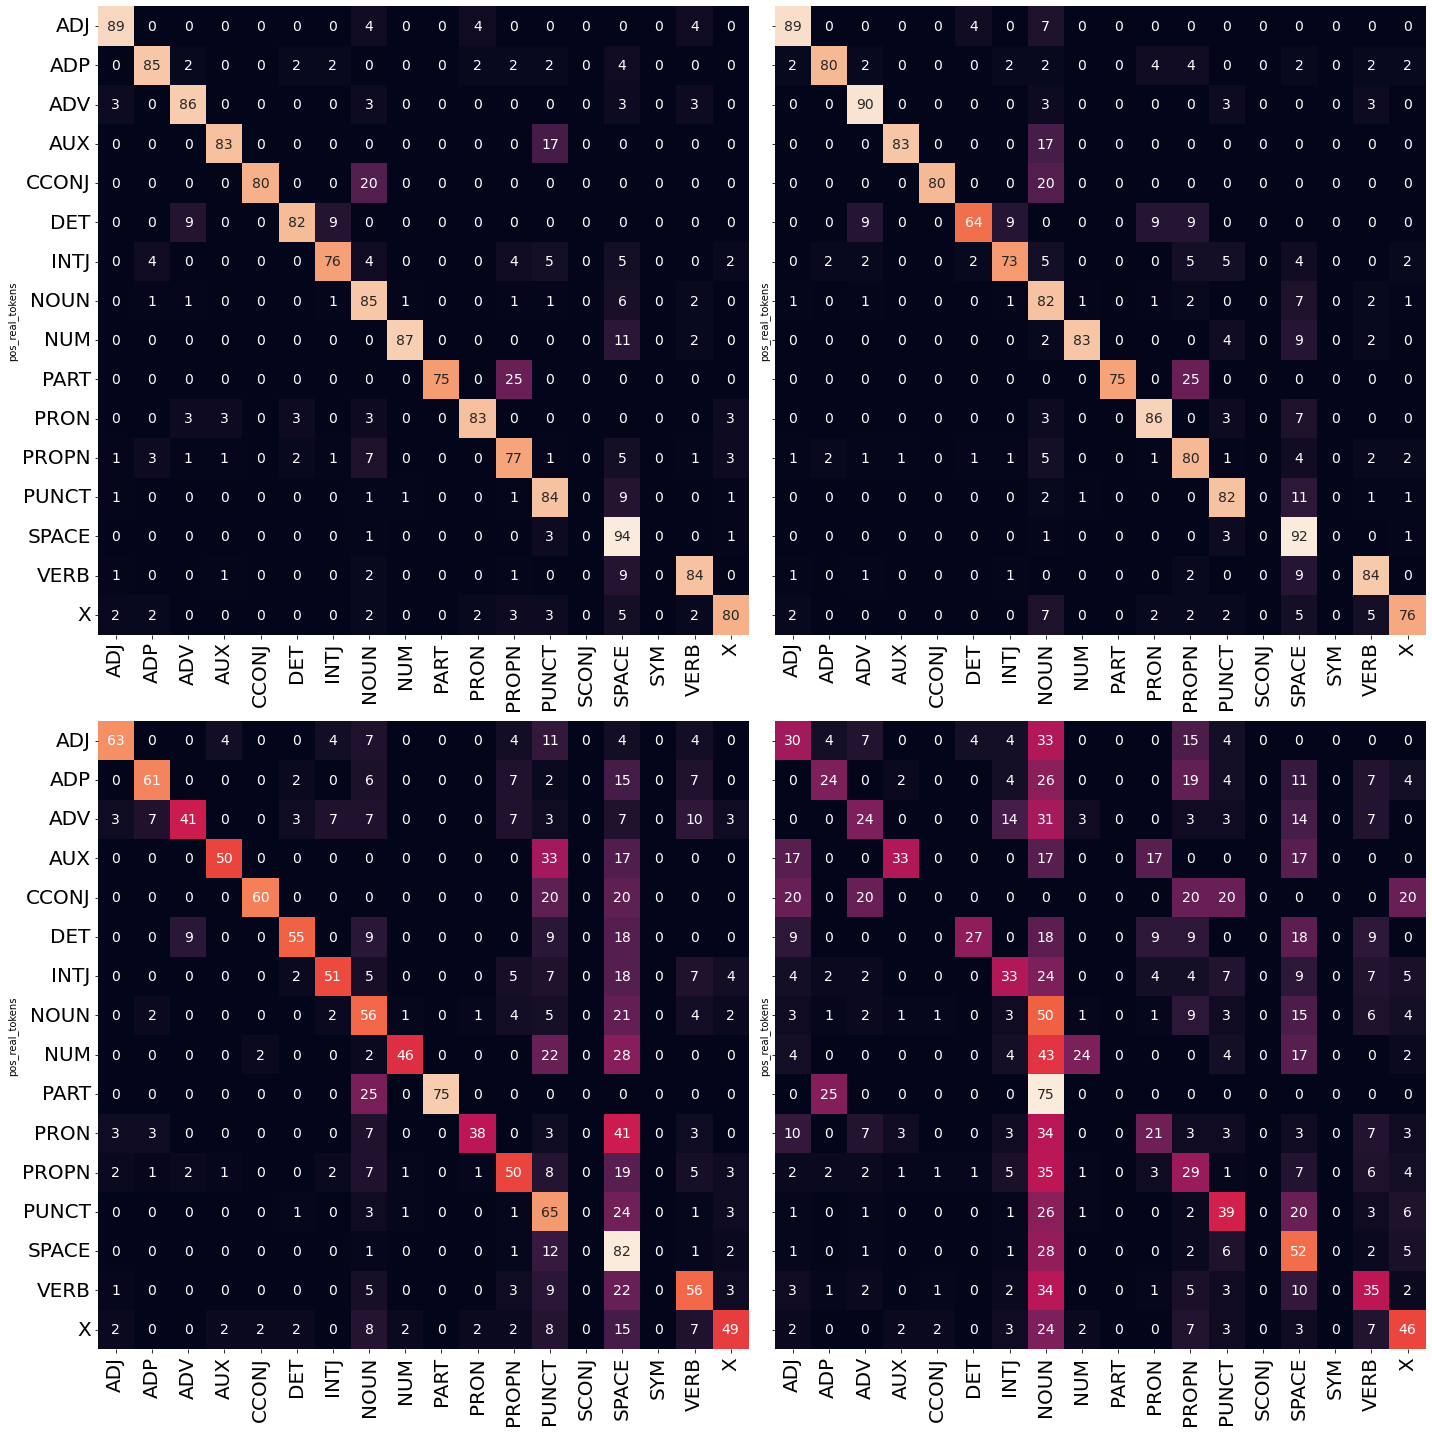

In [8]:
indir = Path("./output/dfs/")
model_name_or_path = "bert-base-uncased"
df = pd.read_csv(indir / f"{model_name_or_path}_masked_generation.csv")
if model_name_or_path == "bert-base-uncased":
    outlier_idxs = [[], [308], [381], [308, 381]]
elif model_name_or_path == "roberta-base":
    outlier_idxs = [[], [77], [588], [77, 588]]
fig, ax = plt.subplots(2, 2, figsize=(20, 20), sharey=True)
ax = ax.reshape(-1)
for idx, idxs in enumerate(outlier_idxs):
    confusiondf = df.groupby("pos_real_tokens").apply(
        lambda x:pos_confusion(x, idxs)
    )
    confusiondf = pd.DataFrame(np.vstack(confusiondf.values), index=confusiondf.index, columns=upos).round(2) * 100
    sns.heatmap(confusiondf, ax=ax[idx], annot=True, cbar=False, annot_kws={'fontsize':14})
    ax[idx].tick_params(axis='both', labelsize=20)
    # set_xticks(fontsize=20)

plt.tight_layout()
plt.show()

In [76]:
confusiondf.iloc[0,:].sum()

100.0